# Data Imbalance Check and SMOTE Repair
This notebook checks for class imbalance in the dataset, visualizes it, and applies SMOTE to address imbalance.

In [2]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [4]:
# 1) imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from pathlib import Path

sns.set(style="whitegrid")
%matplotlib inline

# 2) define paths
project_root = Path().resolve().parent    # assumes you run from notebooks/
processed_fp = project_root/"data"/"processed"/"train_processed.csv"
raw_fp       = project_root/"data"/"raw"/"train_df.csv"

# 3) load data
X = pd.read_csv(processed_fp)
y = pd.read_csv(raw_fp)["readmitted"]

print("Feature columns:", list(X.columns))
print("Total samples:", len(y))

Feature columns: ['num__age', 'num__num_procedures', 'num__days_in_hospital', 'num__comorbidity_score', 'cat__gender_Female', 'cat__gender_Male', 'cat__primary_diagnosis_COPD', 'cat__primary_diagnosis_Diabetes', 'cat__primary_diagnosis_Heart Disease', 'cat__primary_diagnosis_Hypertension', 'cat__primary_diagnosis_Kidney Disease', 'cat__discharge_to_Home', 'cat__discharge_to_Home Health Care', 'cat__discharge_to_Rehabilitation Facility', 'cat__discharge_to_Skilled Nursing Facility']
Total samples: 5000


In [5]:
# 4) check & print class counts
counts = y.value_counts()
print(counts)

readmitted
0    4060
1     940
Name: count, dtype: int64


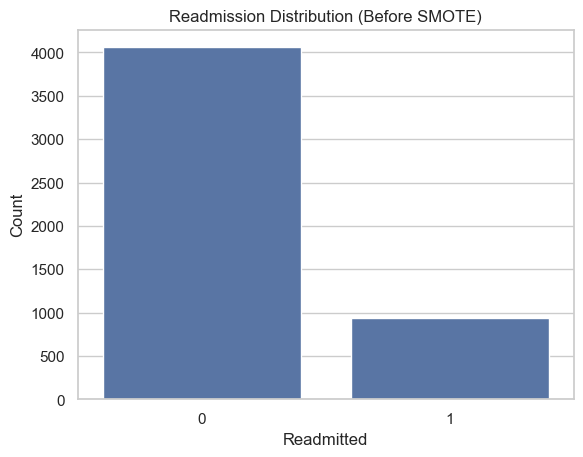

In [6]:
# 5) visualize before SMOTE
sns.barplot(x=counts.index.astype(str), y=counts.values)
plt.title("Readmission Distribution (Before SMOTE)")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()

In [7]:
# 6) apply SMOTE on your processed features
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

res_counts = pd.Series(y_res).value_counts()
print("After SMOTE:", res_counts.to_dict())

After SMOTE: {0: 4060, 1: 4060}


/Users/aryansunilpatil/PAML Assignments/final project/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


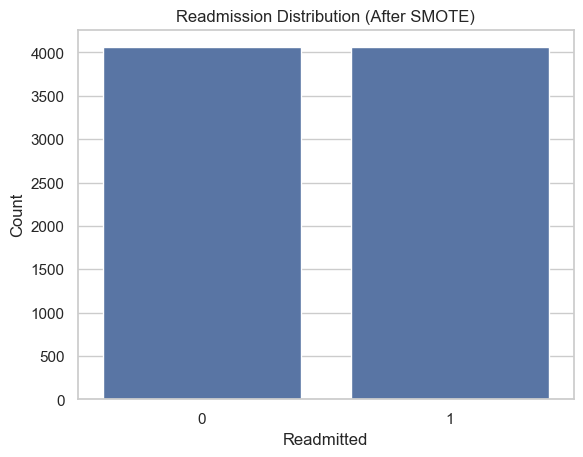

In [8]:
# 7) visualize after SMOTE
sns.barplot(x=res_counts.index.astype(str), y=res_counts.values)
plt.title("Readmission Distribution (After SMOTE)")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()

In [9]:
pd.DataFrame(X_res, columns=X.columns).assign(readmitted=y_res).to_csv("/Users/aryansunilpatil/PAML Assignments/final project/data/balanced/balanced_train.csv", index=False)